### Igor Ratajczyk

In [105]:
import tensorflow as tf
from tensorflow import keras
import scipy
import numpy as np
from typing import List, Tuple, Dict, Any, Generator
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [106]:
tf.random.set_seed(1234)

In [145]:
def get_default_settings() -> Dict[str, Any]:
    return {
        "input_shape": (),
        "output_layer": None,
        "widths":  [16, 16, 16,], 
        "activation": 'relu',
        "learning_rate": 1e-3,
        "epochs": 100,
        "optimizer": 'rmsprop',
        "loss": 'mse',
        "metrics": ['mae'],
        "verbose": 0
    }
def update_default_settings(
    parameter: str,
    values: List[Any],
    ):

    for value in values:
        setting: Dict[str, Any] = get_default_settings()
        setting[parameter] = value
        yield setting


def get_neural_network(
    input_shape: Tuple[int],
    output_layer: keras.layers.Layer,
    widths: List[int], 
    activation: str,
    learning_rate: float,
    *args,
    **kwargs
    ) -> keras.models.Model:
    
    model = keras.models.Sequential(
        [keras.layers.InputLayer(input_shape=input_shape)]+
        [keras.layers.Dense(width, activation=activation) for width in widths]+
        [output_layer]
    )
    return model


def get_comparison(
    parameter: str,
    values: List[Any],
    train_X,
    train_y,
    validation_set
    ) -> None:

    plt.figure()
    plt.title(f"Comparison based on {parameter}")
    for setting in update_default_settings(parameter, values):
        model: keras.models.Model = get_neural_network(**setting)
        model.compile(
            optimizer=setting["optimizer"],
            loss = setting["loss"],
            metrics=setting["metrics"],
            )
        history = model.fit(
            train_X, 
            train_y, 
            validation_data= validation_set, 
            epochs = setting["epochs"],
            verbose = setting["verbose"]
            )
        plt.plot(range(setting["epochs"]), history.history[setting["metrics"]], label=f"{parameter}= {setting[parameter]}")
    plt.xlabel('Epochs')
    plt.grid()
    plt.ylabel(setting["metrics"])
    plt.ylim()
    plt.legend()
    plt.show()
    

# Classification


In [146]:
breast_dataset = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_dataset.data, breast_dataset.target, test_size=.1, random_state=42)

# classification default parameters
def get_default_settings() -> Dict[str, Any]:
    return {
        "input_shape": (30),
        "output_layer": keras.layers.Dense(1, activation='sigmoid'),
        "widths":  [4, 4, 4,], 
        "activation": 'relu',
        "learning_rate": 1e-3,
        "epochs": 100,
        "optimizer": 'rmsprop',
        "loss": 'binary_crossentropy',
        "metrics": 'accuracy',
        "verbose": 0
    }

#### Ascending vs Descending

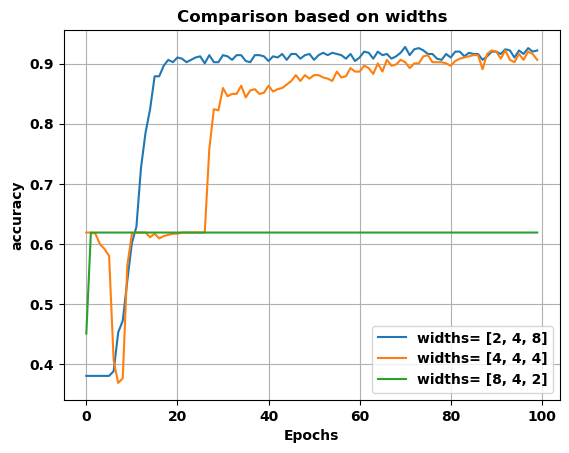

In [109]:

get_comparison(
    parameter = "widths",
    values=[
        [2, 4, 8], # ascending
        [4, 4, 4], # constant
        [8, 4, 2]  # descening
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- bottleneck at the very first layers of networks do not result in poor performance, learning process is fast (as gradients might not have vanished yet)

- descending-layers-width architecture seems to stuck in local minimum

Wnioski:

- wąskie gardło na początku sieci nie daje złych rezultatów, nauka przebiega szybko (pewnie dlatego, że gradienty nie zdołały jeszcze zaniknąć)

- zwężana architektura utyka w minimum lokalnym

#### Width vs Depth

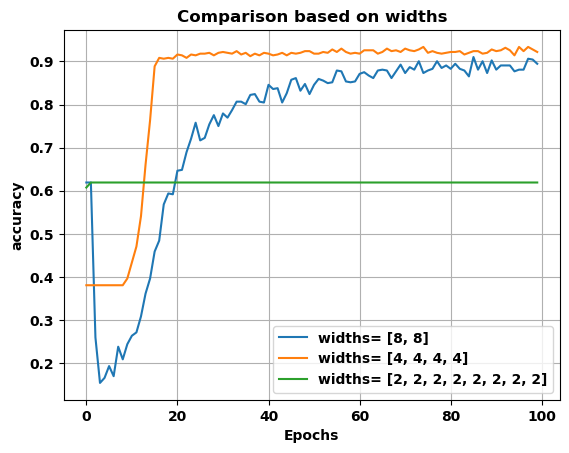

In [123]:
get_comparison(
    parameter = "widths",
    values=[
        [8, 8], # width
        [4, 4, 4, 4], # equilibrum
        [2 for _ in range(8)]  # depth
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- wide NN overcomes local minima

- equilibrated NN performance is remakable

- narrow architecture fails to learn subtle features

Wnioski:

- sieć szeroka nie utyka w minimum lokalnym

- sieć zrównoważona uczy się najszybciej

- bardzo wąska architektura nie ma szans na naukę subtelnych cech

#### Activations


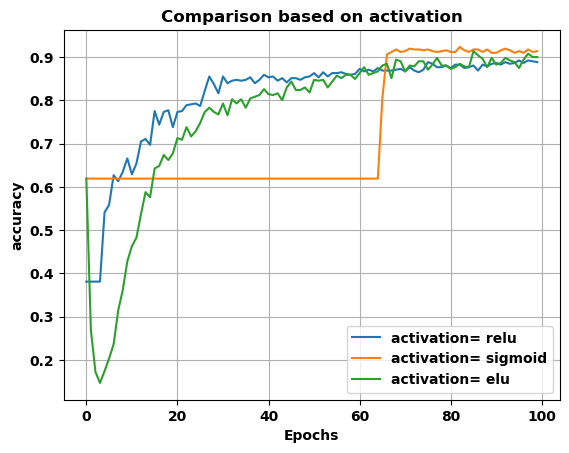

In [148]:
get_comparison(
    parameter = "activation",
    values=[
        "relu",
        "sigmoid", 
        "elu"  
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- ReLU and ELU results are comparable

- Sigmoid activation requires more time to learn but finally convergence rate is better


Wnioski:

- aktywacje relu i elu dają porównywalne wyniki

- aktywacja sigmoidalna dalej osiąga zbieżność nieco wolniej niż pozostałe aktywacje, ale zbieżność jest lepsza.



#### Learning Rate

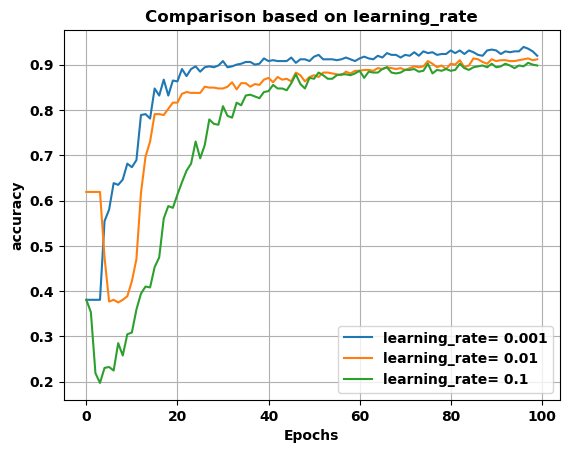

In [128]:
get_comparison(
    parameter = "learning_rate",
    values=[
        1e-3,
        1e-2,
        1e-1, 
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- LR = 1e-3 allows to converge faster, although unintuitive, such phenomenon may be explained via lack of "long step" in "wrong direction" at the very beginning of training


Wnioski:

- LR = 1e-3 pozwala na najszybsze osiągniecie zbieżnosci, ten nieintuicyjny efekt jest wywołany brakiem zbyt dużego kroku w niewłaściwym kierunku na początku uczenia

#### Optimizer

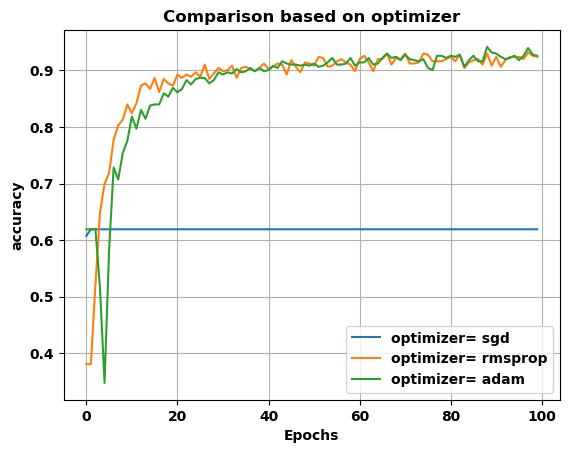

In [127]:
get_comparison(
    parameter = "optimizer",
    values=[
        'sgd',
        'rmsprop',
        'adam', 
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- SGD has stucked in local minimum

- rmsprop and adam optimizers convergence rate is comparable


Wnioski:

- optymalizator SGD utknął w miniumum lokalnym

- rmsprop i adam osiągają zbieżność w podobnym czasie

# Regression

In [139]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)

# regression default parameters
def get_default_settings() -> Dict[str, Any]:
    return {
        "input_shape": (8),
        "output_layer": keras.layers.Dense(1),
        "widths":  [4, 4, 4,], 
        "activation": 'relu',
        "learning_rate": 1e-2,
        "epochs": 100,
        "optimizer": 'rmsprop',
        "loss": 'mse',
        "metrics": 'mse',
        "verbose": 0
    }

#### Ascending vs Descending

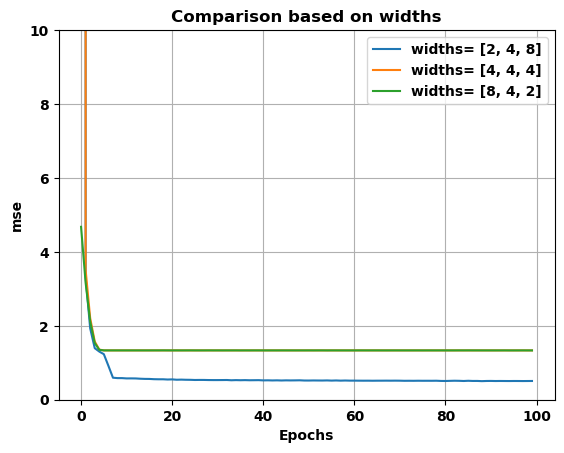

In [140]:
get_comparison(
    parameter = "widths",
    values=[
        [2, 4, 8], # ascending
        [4, 4, 4], # constant
        [8, 4, 2]  # descening
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- ascending-layer-width architecture seems to outperform the competitors


Wnioski:

- architektura wstępująca z rozmiarami warstw okazała się najlepsza.

#### Width vs Depth

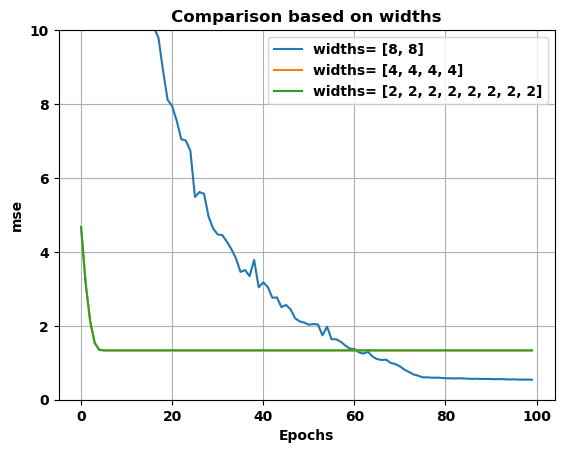

In [141]:
get_comparison(
    parameter = "widths",
    values=[
        [8, 8], # width
        [4, 4, 4, 4], # equilibrum
        [2 for _ in range(8)]  # depth
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- deep NN converges faster

- wide NN finally approaches better results

- equlibrated architecuture diverges


Wnioski: 

- architektura szeroka i głęboka osiągają podobną zbieżność, głęboka szybciej, szeroka lepszą

- architektura umiarkowana nie osiąga zbieżności

#### Activations


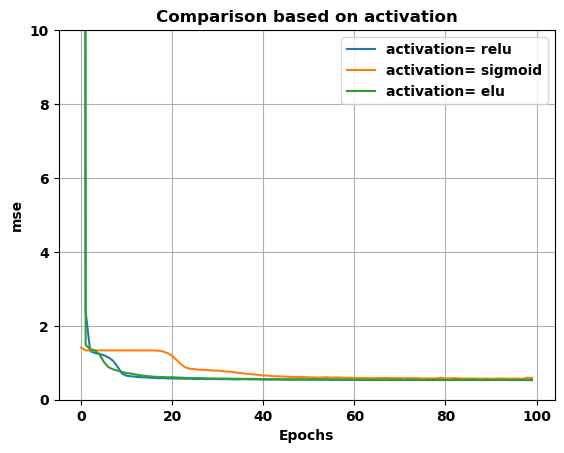

In [142]:
get_comparison(
    parameter = "activation",
    values=[
        "relu",
        "sigmoid", 
        "elu"  
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- different activation results are indistinguishable

Wnioski:

- wyniki między różnymi aktywacjami są praktycznie nierozróżnialne.

#### Learnign Rate

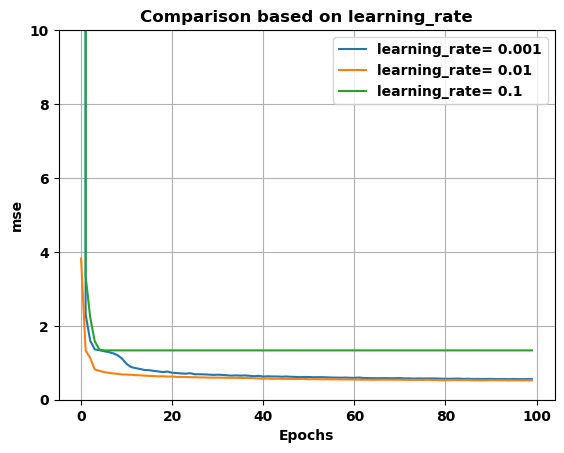

In [143]:
get_comparison(
    parameter = "learning_rate",
    values=[
        1e-3,
        1e-2,
        1e-1, 
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- high LR NN stucks in local minimum

Wnioski:

- zbyt duży LR uniemożliwia dotarcie do lepszego rozwiązania

#### Optimizer

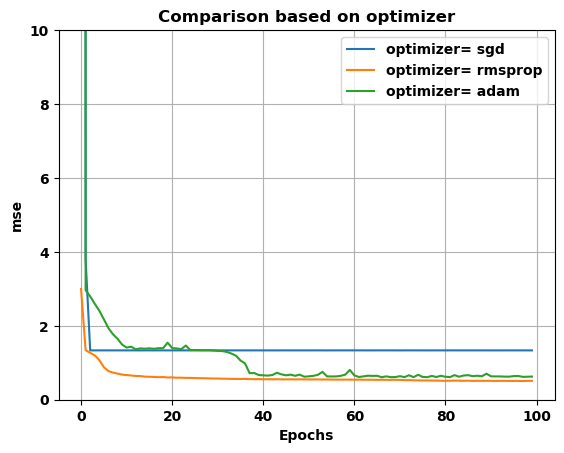

In [144]:
get_comparison(
    parameter = "optimizer",
    values=[
        'sgd',
        'rmsprop',
        'adam', 
    ], 
    train_X = X_train,
    train_y = y_train,
    validation_set=(X_test, y_test)
)

Remarks:

- adam and rmsprop results are similar

- agd stucks in local minimum

Wnioski:

- wyniki adam i rmsprop są zbliżone

- sgd uniemożliwia dalsze zmniejszanie błędu

# Final Results

Problems to be solved were simple, as numerous tests concerning parameters are way more prolific than few complex problems.

Neural Network architecture optimization due to its complex nature - long training process, complex performance index measurement, categorical, discrete and continuous variables simultaneously - is not trivial.

This problem may be solved via Evolutionary Algorithm.

# Wnioski 

Rozwiązywane problemy były wzgędnie proste, uznałem, że lepiej przeprowadzić testy na większej liczbie parametrów niż na trudniejszym problemie.

Optymalizacja architektury sieci neuronowych ze względu na długą naukę, nieoczywisty pomiar jakości, kategoryczne, dyskretne oraz ciągłe zmienne decyzyjne jednocześnie nie jest zadaniem trywialnym.
Na szczęście rozwiązania zdają się zachowywać jakąś strukturę, zależności parametrów między sobą parami lub więszymi podzbiorami.

Pewnym podejściem do rozwiązania tego problemu byłby algorytm ewolucyjny.